In [5]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
font = {'size': 16}
matplotlib.rc('font', **font)

In [6]:
basedir = './국토교통부_실거래가_공개시스템/단독다가구매매/'
filenames = [f for f in os.listdir(basedir) if (f.endswith('.csv'))&('(' in f)]#&('실거래가' in f)]
filenames

['단독다가구(매매)_실거래가_20130101_20131231.csv',
 '단독다가구(매매)_실거래가_20140101_20141231.csv',
 '단독다가구(매매)_실거래가_20150101_20151231.csv',
 '단독다가구(매매)_실거래가_20160101_20161231.csv',
 '단독다가구(매매)_실거래가_20170101_20171231.csv',
 '단독다가구(매매)_실거래가_20180101_20181231.csv',
 '단독다가구(매매)_실거래가_20190101_20191231.csv',
 '단독다가구(매매)_실거래가_20200101_20201231.csv',
 '단독다가구(매매)_실거래가_20210101_20210330.csv']

In [7]:
dfs_list = []
for i, f in tqdm(enumerate(filenames)):
    df = pd.read_csv(basedir + f, encoding='euc-kr', header=15)
    if '해제사유발생일' in df.columns.tolist():
        df = df.drop(columns=['해제사유발생일'])
    
    dfs_list.append(df)    

9it [00:00, 44.75it/s]


In [34]:
concat_df = pd.concat(dfs_list).reset_index(drop=True)
print(concat_df.shape)
concat_df.head()

(109022, 11)


,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명
0,서울특별시 강남구 논현동,8*,다가구,8m미만,329.78,165.4,201305,24,"177,500",1993.0,논현로138길
1,서울특별시 강남구 논현동,1**,다가구,8m미만,335.90,171.4,201312,18,"173,500",1990.0,학동로12길
2,서울특별시 강남구 논현동,7*,다가구,8m미만,435.32,177.2,201304,23,"138,000",1992.0,논현로146길
3,서울특별시 강남구 논현동,1**,다가구,8m미만,347.10,181.9,201308,28,"169,000",1991.0,선릉로135길
4,서울특별시 강남구 논현동,2**,다가구,8m미만,401.33,193.8,201305,21,"179,000",1997.0,논현로124길


In [35]:
concat_df['구'] = concat_df['시군구'].apply(lambda x: x.split(' ')[1])
concat_df['동'] = concat_df['시군구'].apply(lambda x: x.split(' ')[2])

In [36]:
def day_modifier(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x)
        if len(x) == 1:
            return '0' + x
        else:
            return x

In [37]:
concat_df['계약년월'] = concat_df['계약년월'].apply(str)
concat_df['계약일'] = concat_df['계약일'].apply(str)

In [38]:
concat_df['계약일'] = concat_df['계약일'].apply(day_modifier)

In [39]:
concat_df['계약날짜'] = concat_df['계약년월'].apply(lambda x: x[:4]) + '-' + concat_df['계약년월'].apply(lambda x: x[-2:])\
+ '-' + concat_df['계약일']

In [40]:
concat_df['계약날짜'] = pd.to_datetime(concat_df['계약날짜'], format='%Y-%m-%d')

In [41]:
concat_df['거래금액(만원)'] = concat_df['거래금액(만원)'].apply(lambda x: int(x.replace(',','')))
concat_df['단가(평)'] = concat_df['거래금액(만원)'] / concat_df['대지면적(㎡)'] * 3.30579

In [42]:
concat_df.head()

,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명,구,동,계약날짜,단가(평)
0,서울특별시 강남구 논현동,8*,다가구,8m미만,329.78,165.4,201305,24,177500,1993.0,논현로138길,강남구,논현동,2013-05-24,3547.628325
1,서울특별시 강남구 논현동,1**,다가구,8m미만,335.90,171.4,201312,18,173500,1990.0,학동로12길,강남구,논현동,2013-12-18,3346.292678
2,서울특별시 강남구 논현동,7*,다가구,8m미만,435.32,177.2,201304,23,138000,1992.0,논현로146길,강남구,논현동,2013-04-23,2574.486569
3,서울특별시 강남구 논현동,1**,다가구,8m미만,347.10,181.9,201308,28,169000,1991.0,선릉로135길,강남구,논현동,2013-08-28,3071.349698
4,서울특별시 강남구 논현동,2**,다가구,8m미만,401.33,193.8,201305,21,179000,1997.0,논현로124길,강남구,논현동,2013-05-21,3053.335449


In [43]:
target = '노량진동'
target_year = 2018

In [44]:
target_df = concat_df[(concat_df['동'] == target)&(concat_df['계약날짜'].dt.year >= target_year)]
print(target_df.shape)

(265, 15)


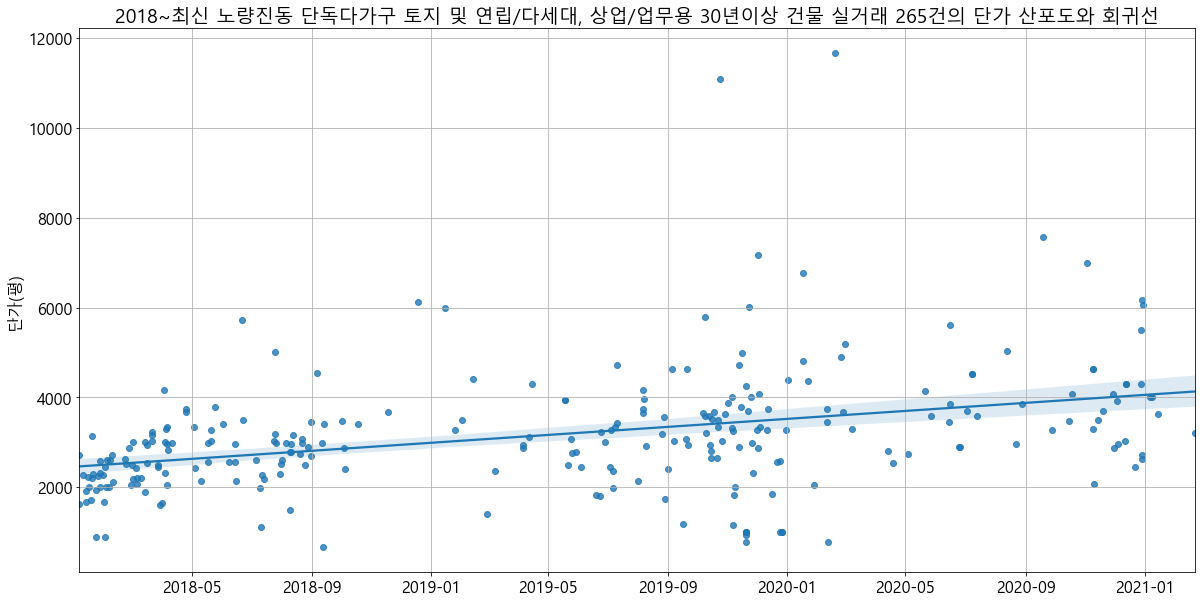

In [45]:
f, ax = plt.subplots(figsize=(20,10))
plt.title('{}~최신 {} {} 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 산포도와 회귀선'.format(target_year, target, '단독다가구', target_df.shape[0]))
plt.grid(True)
ax.xaxis.update_units(target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target_df['계약날짜']), y=target_df['단가(평)'])
plt.savefig('./국토교통부_실거래가_공개시스템/땅값분석/' + '{}{}/산포도.png'.format(target, '단독다가구'))

In [49]:
target_df = target_df.sort_values(['단가(평)'], ascending=False).reset_index(drop=True)

In [50]:
target_df.to_excel('./국토교통부_실거래가_공개시스템/땅값분석/노량진동단독다가구/땅값분석.xlsx')